<a href="https://colab.research.google.com/github/FizaAnwar/LetsGrowForMore/blob/main/iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Dependencies

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


Data Collection and Processing

In [ ]:
iris_data=pd.read_csv('/content/IRIS.csv')

In [ ]:
# printing first five rows of the dataframe
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Getting some statistical measures about the data
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#Getting some information about the Data
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# Display number of samples on each class
iris_data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [ ]:
# check for null values
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Exploratory Data Analysis


Data Visualization


<Axes: >

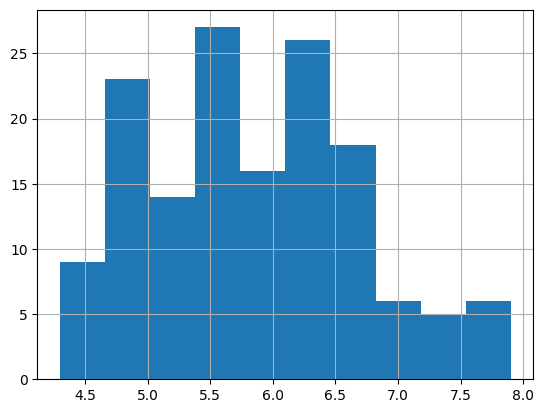

In [ ]:
# Histrogram for sepal_length
iris_data['sepal_length'].hist()

<Axes: >

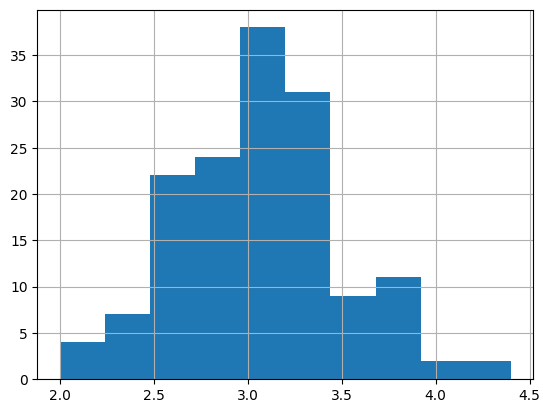

In [ ]:
# Histrogram for sepal_width
iris_data['sepal_width'].hist()

<Axes: >

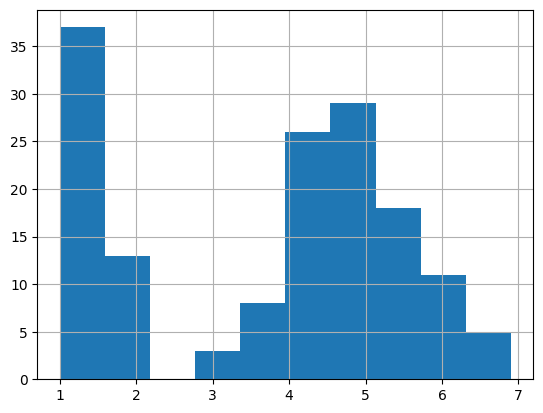

In [ ]:
# Histrogram for petal_length
iris_data['petal_length'].hist()

<Axes: >

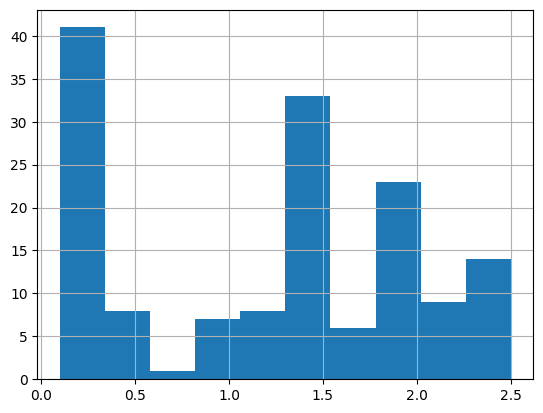

In [ ]:
# Histrogram for petal_width
iris_data['petal_width'].hist()

In [ ]:
# Scatterplot
colors=['red','orange','green']
species =['Iris-setosa','Iris-versicolor','Iris-virginica']

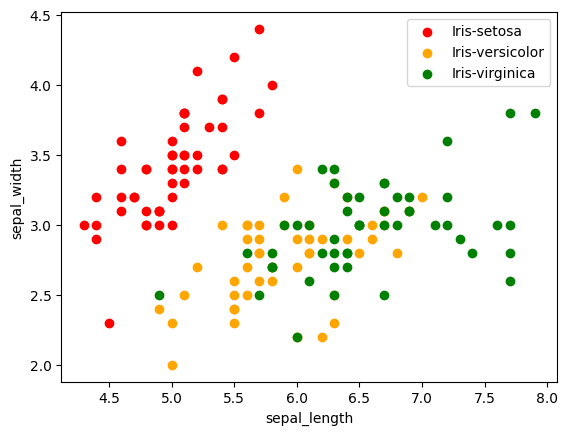

In [ ]:
for i in range (3):
  x=iris_data[iris_data['species']== species[i]]
  plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
  plt.xlabel("sepal_length")
  plt.ylabel("sepal_width")
  plt.legend()

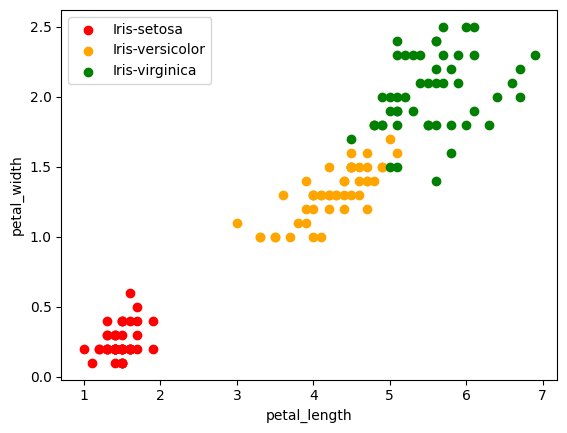

In [ ]:
for i in range (3):
  x=iris_data[iris_data['species']== species[i]]
  plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
  plt.xlabel("petal_length")
  plt.ylabel("petal_width")
  plt.legend()

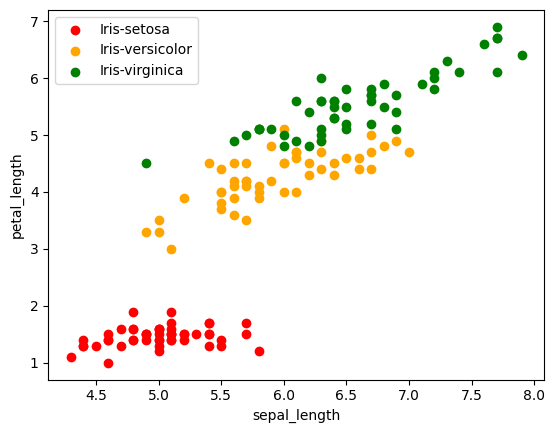

In [ ]:
for i in range (3):
  x=iris_data[iris_data['species']== species[i]]
  plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
  plt.xlabel("sepal_length")
  plt.ylabel("petal_length")
  plt.legend()

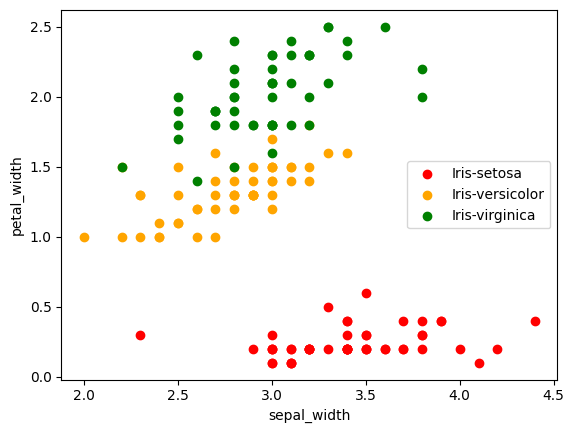

In [ ]:
for i in range (3):
  x=iris_data[iris_data['species']== species[i]]
  plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=species[i])
  plt.xlabel("sepal_width")
  plt.ylabel("petal_width")
  plt.legend()

Correlation Matrix

In [ ]:
iris_data.corr()

<ipython-input-18-5c5a46e05691>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris_data.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<ipython-input-21-fd22ff8416d4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=iris_data.corr()


<Axes: >

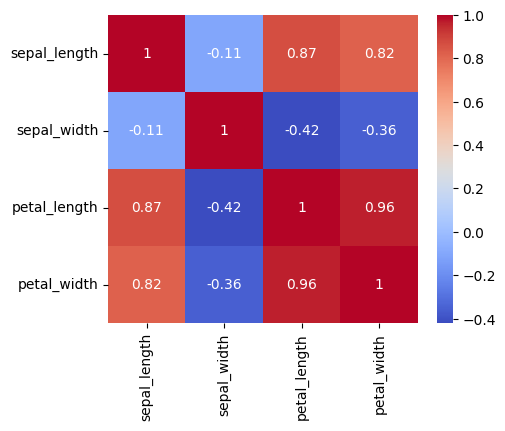

In [ ]:
corr=iris_data.corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
iris_data['species']=le.fit_transform(iris_data['species'])
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Model Training


In [ ]:
from sklearn.model_selection import train_test_split
X=iris_data.drop(columns=['species'])
Y=iris_data['species']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

Model Training


In [ ]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
# print metric to get performance
print("Accuracy Score:",model.score(X_test,Y_test)*100)


Accuracy Score: 100.0


In [ ]:
# knn -k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [ ]:
model.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
# print metric to get performance
print("Accuracy Score:",model.score(X_test,Y_test)*100)

Accuracy Score: 100.0


In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()

In [ ]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
# print metric to get performance
print("Accuracy Score:",model.score(X_test,Y_test)*100)

Accuracy Score: 97.77777777777777
